In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# This notebook should be run under "scripts/"

import sys
import os

PATH = os.getcwd()
for _ in range(2):
    PATH = os.path.dirname(PATH)

if PATH not in sys.path:
    sys.path.append(PATH)

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle


from BusinessAnalyticsProject.dataset.feature_engineering import train_test_split
from BusinessAnalyticsProject.models.model_selection import (
    create_pipeline,
    hyperparam_tuning,
    metrics,
    benchmark,
    OLS,RR
)
# from BusinessAnalyticsProject.configs.RF import CONFIG as RF_CONFIG

from BusinessAnalyticsProject.models.model_interpretation import (
    create_benchmark_plot,
    create_benchmark_plot_with_p,
    create_feature_importance_plot
)

In [4]:
sns.set_theme()

## Read in Features

In [5]:
all_train_df = pd.read_csv("../data/processed/all_train.csv", index_col=[0], parse_dates=["Date"])
all_test_df = pd.read_csv("../data/processed/all_test.csv", index_col=[0], parse_dates=["Date"])

X_train, y_train, weights_train, X_test, y_test, weights_test = train_test_split(all_train_df)
X_train.shape, y_train.shape, weights_train.shape, X_test.shape, y_test.shape, weights_test.shape

((294132, 15), (294132,), (294132,), (127438, 15), (127438,), (127438,))

# Ordinary Least Square (OLS) 普通最小二乘法

In [20]:
pipeline_data = create_pipeline(
    None,
    None,
    if_data_normalization = True,
    if_to_one_hot = True
)
pipeline_data

ColumnTransformer(transformers=[('categorical',
                                 Pipeline(steps=[('one_hot', OneHotEncoder())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001E780B6B3A0>),
                                ('continuous',
                                 Pipeline(steps=[('standard_norm',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001E780B6B100>)])

In [21]:
results, metrics_val, rho = OLS(
    pipeline_data,
    X_train, y_train, weights_train,
    X_test, y_test, weights_test
)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     4672.
Date:                Wed, 20 Mar 2024   Prob (F-statistic):               0.00
Time:                        15:15:39   Log-Likelihood:            -3.2328e+06
No. Observations:              294132   AIC:                         6.466e+06
Df Residuals:                  294033   BIC:                         6.467e+06
Df Model:                          98                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                       -1.622e+14   1.45e+15     -0.112      0.911   -3.01e+15    2.69e+15
categorical__Dept_1          4.861e+14   9.43e+14      0.516      0.606   -1.36e+15    2.33e+15
categorical__Dept_2          4.861e+14   9.43e+14      0.516      0.606   -1.36e+15    2.33e+15
categorical__Dept_3          4.861e+14   9.43e+14      0.516      0.606   -1.36e+15    2.33e+15
categorical__Dept_4          4.861e+14   9.43e+14      0.516      0.606   -1.36e+15    2.33e+15
categorical__Dept_5          4.861e+14   9.43e+14      0.516      0.606   -1.36e+15    2.33e+15
categorical__Dept_6          4.861e+14   9.43e+14      0.516      0.606   -1.36e+15    2.33e+15
categorical__Dept_7          4.861e+14   9.43e+14      0.516      0.606   -1.36e+15    2.33e+15
categorical__Dept_8          4.861e+14   9.43e+14      0.516      0.606   -1.36e+15    2.33e+15
categorical__Dept_9          4.861e+14   9.43e+14      0.516      0.606   -1.36e+15    2.33e+15
categorical__Dept_10         4.861e+14   9.43e+14      0.516      0.606   -1.36e+15    2.33e+15
categorical__Dept_11         4.861e+14   9.43e+14      0.516      0.606   -1.36e+15    2.33e+15
categorical__Dept_12         4.861e+14   9.43e+14      0.516      0.606   -1.36e+15    2.33e+15
categorical__Dept_13         4.861e+14   9.43e+14      0.516      0.606   -1.36e+15    2.33e+15
categorical__Dept_14         4.861e+14   9.43e+14      0.516      0.606   -1.36e+15    2.33e+15
categorical__Dept_16         4.861e+14   9.43e+14      0.516      0.606   -1.36e+15    2.33e+15
categorical__Dept_17         4.861e+14   9.43e+14      0.516      0.606   -1.36e+15    2.33e+15
categorical__Dept_18         4.861e+14   9.43e+14      0.516      0.606   -1.36e+15    2.33e+15
categorical__Dept_19         4.861e+14   9.43e+14      0.516      0.606   -1.36e+15    2.33e+15
categorical__Dept_20         4.861e+14   9.43e+14      0.516      0.606   -1.36e+15    2.33e+15
categorical__Dept_21         4.861e+14   9.43e+14      0.516      0.606   -1.36e+15    2.33e+15
categorical__Dept_22         4.861e+14   9.43e+14      0.516      0.606   -1.36e+15    2.33e+15
categorical__Dept_23         4.861e+14   9.43e+14      0.516      0.606   -1.36e+15    2.33e+15
categorical__Dept_24         4.861e+14   9.43e+14      0.516      0.606   -1.36e+15    2.33e+15
categorical__Dept_25         4.861e+14   9.43e+14      0.516      0.606   -1.36e+15    2.33e+15
categorical__Dept_26         4.861e+14   9.43e+14      0.516      0.606   -1.36e+15    2.33e+15
categorical__Dept_27         4.861e+14   9.43e+14      0.516      0.606   -1.36e+15    2.33e+15
categorical__Dept_28         4.861e+14   9.43e+14      0.516      0.606   -1.36e+15    2.33e+15
categorical__Dept_29         4.861e+14   9.43e+14      0.516      0.606   -1.36e+15    2.33e+15
categorical

In [18]:
metrics_val

{'r2_score': 0.6528127240463191,
 'rmse': 13033.947995458706,
 'rwmse': 5127111.2533350205}

In [13]:
rho

array([0.3972994])

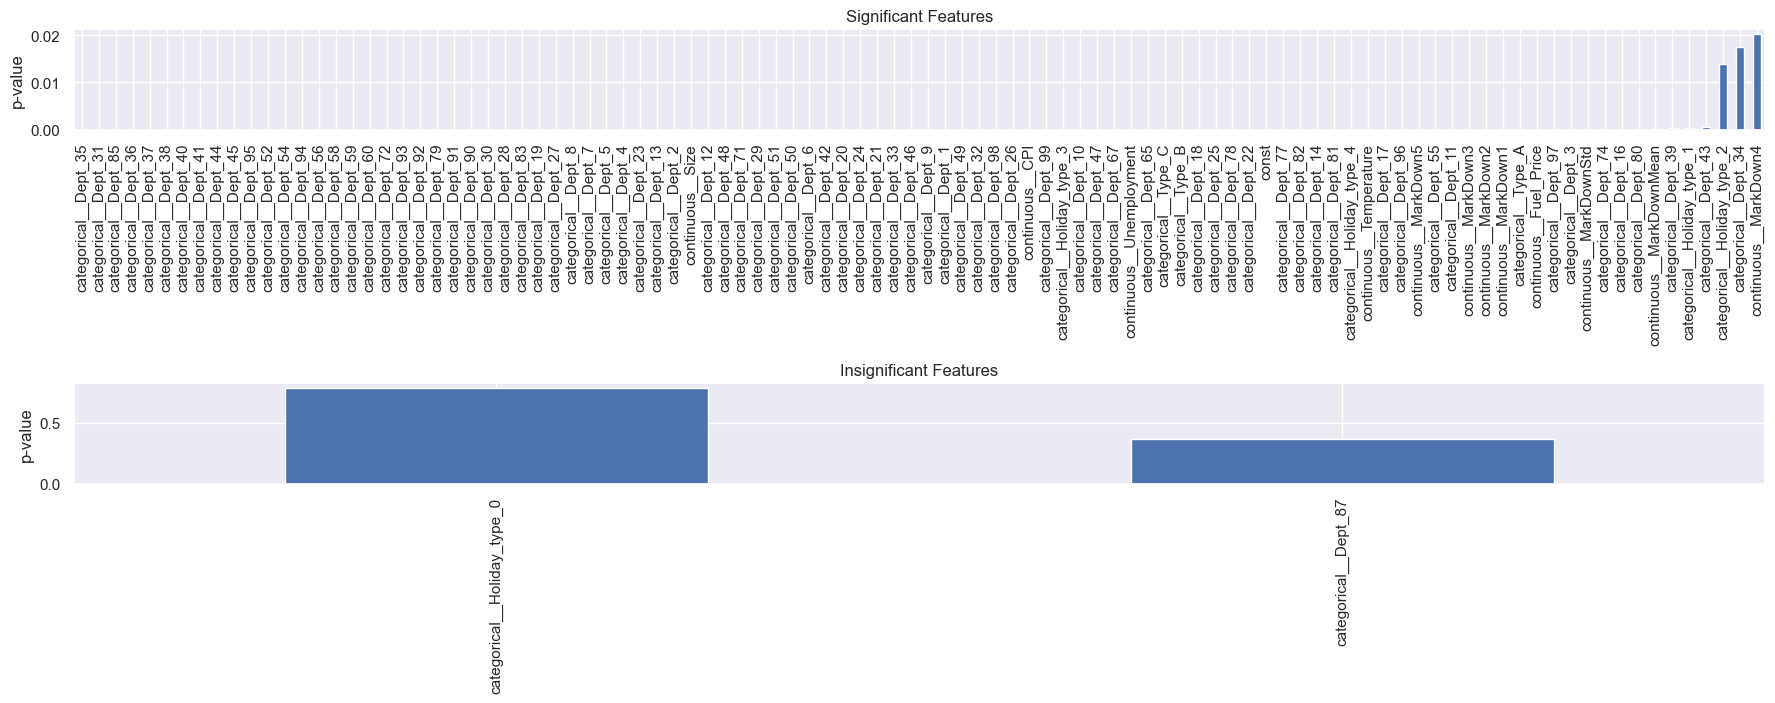

In [14]:
fig, axes = create_benchmark_plot(results)

# Ridge Regression 岭回归

In [42]:
pipeline_data = create_pipeline(
    None,
    None,
    if_data_normalization = True,
    if_to_one_hot=True
)
pipeline_data

ColumnTransformer(transformers=[('categorical',
                                 Pipeline(steps=[('one_hot', OneHotEncoder())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001E780B65700>),
                                ('continuous',
                                 Pipeline(steps=[('standard_norm',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001E780B657F0>)])

In [43]:
results, metrics_val, ret = RR(
    pipeline_data,
    X_train, y_train, weights_train,
    X_test, y_test, weights_test
)

In [36]:
metrics_val

{'r2_score': 0.6528319079644411,
 'rmse': 13033.587893486943,
 'rwmse': 5127007.073410695}

In [29]:
r2

0.6528360350668568

# Hyper-Tuning (RR)

In [48]:
from BusinessAnalyticsProject.configs.RR import CONFIG as RR_CONFIG
RR_CONFIG

{'model_cls': sklearn.linear_model._ridge.Ridge,
 'params': {'alpha': 1, 'tol': 0.0001},
 'param_space': {'alpha': [1e-15,
   1e-12,
   1e-10,
   1e-05,
   0.001,
   0.01,
   0.05,
   0.08,
   0.1,
   0.2,
   0.3,
   0.4,
   0.5,
   1],
  'tol': [0.0001, 1e-05, 0.001]}}

In [49]:
pipeline = create_pipeline(
    RR_CONFIG["model_cls"],
    RR_CONFIG["params"],
    if_winsorization=False,
    if_data_normalization=False,
    if_to_one_hot=True
)
pipeline

Pipeline(steps=[('data_preprocessing',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001E780B680D0>),
                                                 ('continuous',
                                                  Pipeline(steps=[('dummy',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<function identity at 0x000001E780CF8940>))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001E780B68C10>)])),
                ('model', Ridge(alpha=1))])

In [50]:
opt, metrics_val = hyperparam_tuning(
    pipeline,
    RR_CONFIG["param_space"],
    X_train,
    y_train,
    weights_train,
    X_test,
    y_test,
    weights_test,
    save_dir="../outputs/models/RR/"
)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.4, 0.001] before, using random point [0.2, 0.0001]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [1e-10, 0.001] before, using random point [0.4, 0.001]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.5, 1e-05] before, using random point [0.3, 0.0001]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.001, 0.0001] before, using random point [0.08, 0.0001]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [0.5, 1e-05] before, using random point [1e-05, 0.001]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


# Lasso Regression

In [69]:
from BusinessAnalyticsProject.models.model_selection import LSO

In [70]:
pipeline_data = create_pipeline(
    None,
    None,
    if_data_normalization=True,
    if_to_one_hot=True
)
pipeline_data

ColumnTransformer(transformers=[('categorical',
                                 Pipeline(steps=[('one_hot', OneHotEncoder())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001E780B74790>),
                                ('continuous',
                                 Pipeline(steps=[('standard_norm',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001E7CD6D8D30>)])

In [71]:
results, metrics_val, r2 = LSO(
    pipeline_data,
    X_train, y_train, weights_train,
    X_test, y_test, weights_test
)

C:\Users\lenovo\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.032e+13, tolerance: 1.551e+13
  model = cd_fast.enet_coordinate_descent(


In [72]:
r2

0.6528360344674335

# Hyper-Tuning (Lasso)

In [55]:
from BusinessAnalyticsProject.configs.LSO import CONFIG as LSO_CONFIG
LSO_CONFIG

{'model_cls': sklearn.linear_model._coordinate_descent.Lasso,
 'params': {'alpha': 0.001, 'tol': 0.0001},
 'param_space': {'alpha': [1e-10, 1e-08, 1e-06, 1e-05, 0.0001],
  'tol': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]}}

In [57]:
pipeline = create_pipeline(
    LSO_CONFIG["model_cls"],
    LSO_CONFIG["params"],
    if_winsorization=False,
    if_data_normalization=True,
    if_to_one_hot=True
)
pipeline

Pipeline(steps=[('data_preprocessing',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001E780D01EB0>),
                                                 ('continuous',
                                                  Pipeline(steps=[('standard_norm',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001E780D016A0>)])),
                ('model', Lasso(alpha=0.001))])

In [58]:
opt, metrics_val = hyperparam_tuning(
    pipeline,
    LSO_CONFIG["param_space"],
    X_train,
    y_train,
    weights_train,
    X_test,
    y_test,
    weights_test,
    save_dir="../outputs/models/LSO/"
)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

C:\Users\lenovo\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:639: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30319810190267.023, tolerance: 1550721410849.8694
  model = cd_fast.sparse_enet_coordinate_descent(
